In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nadznaf/dataset_ppd/refs/heads/main/Air_Traffic_Passenger_Statistics_20251102.csv', delimiter=',')

df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,"31,432",2025/10/20 01:00:29 PM,2025/10/22 03:03:58 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,"31,353",2025/10/20 01:00:29 PM,2025/10/22 03:03:58 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,"2,518",2025/10/20 01:00:29 PM,2025/10/22 03:03:58 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,"1,324",2025/10/20 01:00:29 PM,2025/10/22 03:03:58 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,"1,198",2025/10/20 01:00:29 PM,2025/10/22 03:03:58 PM


In [8]:
df.shape

(38719, 15)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Activity Period,38719.0,201289.324905,766.421341,199907.0,200610.0,201310.0,201909.0,202508.0


# Clustering Analysis: K-Means vs K-Medoids

## Data preprocessing

In [ ]:
df_processed = df.drop(['Activity Period'], axis=1)
df_processed['Operating Airline'].fillna('Unknown', inplace=True)
df_processed['Passenger Count'] = pd.to_numeric(df_processed['Passenger Count'])

for col in ['GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area']:
    if df_processed[col].isnull().any():
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

if df_processed['Passenger Count'].isnull().any():
    df_processed['Passenger Count'].fillna(df_processed['Passenger Count'].mean(), inplace=True)

categorical_cols = ['GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_processed_scaled = scaler.fit_transform(df_processed)
df_processed = pd.DataFrame(df_processed_scaled, columns=df_processed.columns)

display(df_processed.head())

,Passenger Count,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,...,Terminal_Terminal 1,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other
0,0.058132,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,2.141389,-0.270175,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307
1,0.056856,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,2.141389,-0.270175,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307
2,-0.408682,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,2.141389,-0.270175,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307
3,-0.427959,0.731358,-0.233014,-0.322029,-0.159195,2.228028,-0.285546,-0.141593,-0.048537,-0.731358,...,-0.466987,3.701310,-0.385828,-0.342824,-0.260471,3.701310,-0.233014,-0.291011,-0.618526,-0.028307
4,-0.429993,0.731358,-0.233014,-0.322029,-0.159195,2.228028,-0.285546,-0.141593,-0.048537,-0.731358,...,-0.466987,3.701310,-0.385828,-0.342824,-0.260471,3.701310,-0.233014,-0.291011,-0.618526,-0.028307


## Elbow Method

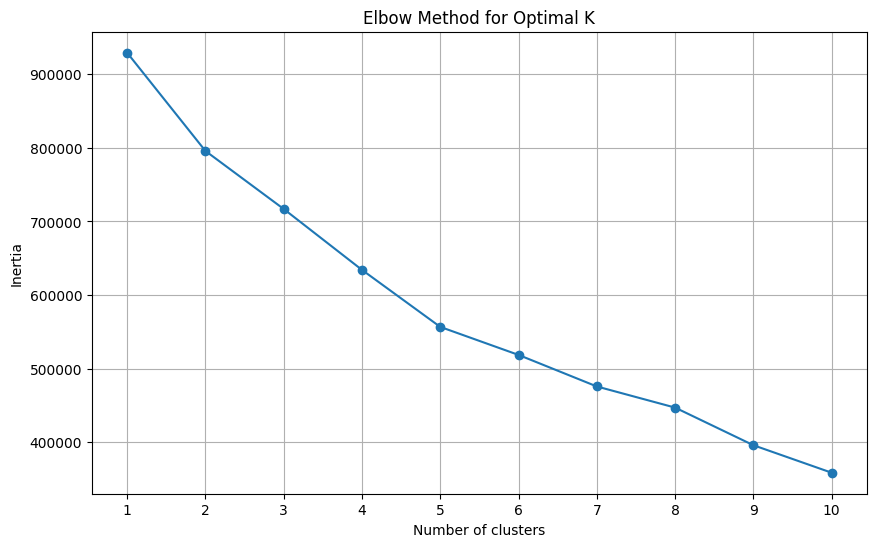

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## K-Means

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_processed['KMeans_Cluster'] = kmeans.fit_predict(df_processed)

df_with_clusters = df_processed.copy()
df_with_clusters['Operating Airline'] = df['Operating Airline']
df_with_clusters['Activity Period'] = df['Activity Period']

silhouette_avg = silhouette_score(df_processed.drop('KMeans_Cluster', axis=1), df_processed['KMeans_Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

df_with_clusters.head()

,Passenger Count,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,...,Terminal_Terminal 2,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,kmeans_cluster
0,0.058132,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,-0.270175,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307,1
1,0.056856,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,-0.270175,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307,1
2,-0.408682,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,-0.270175,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307,1
3,-0.427959,0.731358,-0.233014,-0.322029,-0.159195,2.228028,-0.285546,-0.141593,-0.048537,-0.731358,...,3.701310,-0.385828,-0.342824,-0.260471,3.701310,-0.233014,-0.291011,-0.618526,-0.028307,0
4,-0.429993,0.731358,-0.233014,-0.322029,-0.159195,2.228028,-0.285546,-0.141593,-0.048537,-0.731358,...,3.701310,-0.385828,-0.342824,-0.260471,3.701310,-0.233014,-0.291011,-0.618526,-0.028307,0


## K-Medoids

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

class KMedoids:
    def __init__(self, n_clusters=8, random_state=None):
        self.n_clusters = n_clusters
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        
        n, _ = X.shape
        if n < self.n_clusters:
            raise ValueError("Number of clusters cannot be greater than number of samples")
        
        medoid_idx = np.random.choice(n, self.n_clusters, replace=False)
        
        for _ in range(100):
            distances = pairwise_distances(X)
            labels = np.zeros(n, dtype=int)
            for i in range(n):
                distances_to_medoids = distances[i, medoid_idx]
                labels[i] = np.argmin(distances_to_medoids)
            
            new_medoids = []
            for k in range(self.n_clusters):
                cluster_points = np.where(labels == k)[0]
                if len(cluster_points) == 0:
                    new_medoids.append(medoid_idx[k])
                    continue
                
                min_cost = np.inf
                best_medoid = medoid_idx[k]
                for candidate in cluster_points:
                    cost = np.sum(distances[candidate, cluster_points])
                    if cost < min_cost:
                        min_cost = cost
                        best_medoid = candidate
                new_medoids.append(best_medoid)
            
            new_medoids = np.array(new_medoids)
            if np.array_equal(sorted(medoid_idx), sorted(new_medoids)):
                break
            medoid_idx = new_medoids

        self.medoid_indices_ = medoid_idx
        labels = np.zeros(n, dtype=int)
        for i in range(n):
            md = np.inf; lab = 0
            for k, m_i in enumerate(medoid_idx):
                dist = np.linalg.norm(X[i] - X[m_i])
                if dist < md:
                    md = dist; lab = k
            labels[i] = lab
        self.labels_ = labels
        return self

kmedoids = KMedoids(n_clusters=4, random_state=42)
kmedoids.fit(df_processed.drop(columns=['KMeans_Cluster']).values)
df_processed['KMedoids_Cluster'] = kmedoids.labels_
display(df_processed.head())

Menggunakan implementasi K-Medoids yang lebih efisien untuk dataset besar...
Memulai K-Medoids clustering... (ini mungkin memakan waktu beberapa menit)
K-Medoids clustering selesai!
K-Medoids clustering selesai!


,Passenger Count,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,...,Terminal_Terminal 3,Boarding Area_B,Boarding Area_C,Boarding Area_D,Boarding Area_E,Boarding Area_F,Boarding Area_G,Boarding Area_Other,kmeans_cluster,kmedoids_cluster
0,0.058132,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307,1,1
1,0.056856,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307,1,1
2,-0.408682,-1.367319,-0.233014,-0.322029,-0.159195,-0.448827,-0.285546,-0.141593,-0.048537,1.367319,...,-0.385828,2.916950,-0.260471,-0.270175,-0.233014,-0.291011,-0.618526,-0.028307,1,1
3,-0.427959,0.731358,-0.233014,-0.322029,-0.159195,2.228028,-0.285546,-0.141593,-0.048537,-0.731358,...,-0.385828,-0.342824,-0.260471,3.701310,-0.233014,-0.291011,-0.618526,-0.028307,0,1
4,-0.429993,0.731358,-0.233014,-0.322029,-0.159195,2.228028,-0.285546,-0.141593,-0.048537,-0.731358,...,-0.385828,-0.342824,-0.260471,3.701310,-0.233014,-0.291011,-0.618526,-0.028307,0,1


## PCA Analysis

In [ ]:
from sklearn.decomposition import PCA

df_features = df_processed.drop(columns=['KMeans_Cluster', 'KMedoids_Cluster'])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_features)
df_pca = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
df_pca['KMeans_Cluster'] = df_processed['KMeans_Cluster']
df_pca['KMedoids_Cluster'] = df_processed['KMedoids_Cluster']

display(df_pca.head())

,principal_component_1,principal_component_2,kmeans_cluster,kmedoids_cluster
0,3.818584,-2.126505,1,1
1,3.810619,-2.145734,1,1
2,3.784431,-1.935812,1,1
3,-1.290316,-0.581357,0,1
4,-1.298446,-0.600790,0,1


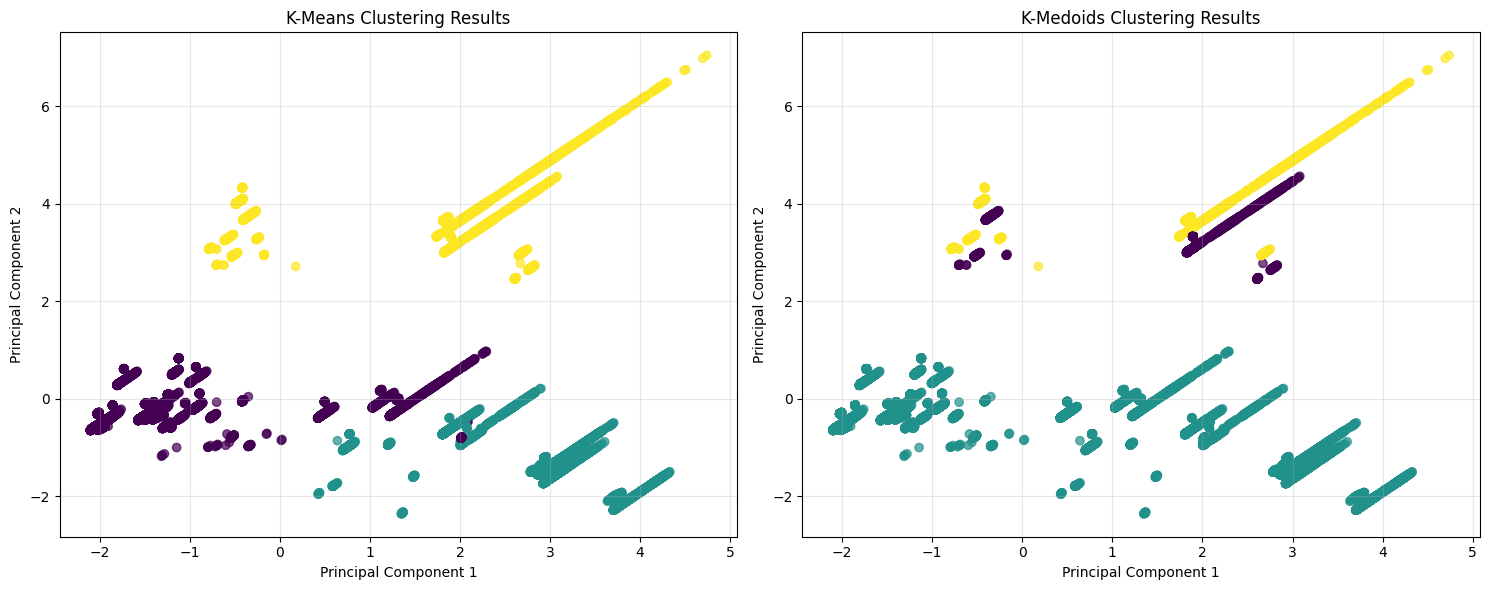

Cluster distribution comparison:

K-Means:
kmeans_cluster
0    25447
1     8255
2     5017
Name: count, dtype: int64

K-Medoids:
kmedoids_cluster
0     1994
1    33702
2     3023
Name: count, dtype: int64


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

scatter1 = ax1.scatter(df_pca['principal_component_1'], 
                      df_pca['principal_component_2'], 
                      c=df_pca['KMeans_Cluster'], 
                      cmap='viridis', 
                      alpha=0.7)
ax1.set_title('K-Means Clustering Results')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.grid(True, alpha=0.3)

scatter2 = ax2.scatter(df_pca['principal_component_1'], 
                      df_pca['principal_component_2'], 
                      c=df_pca['KMedoids_Cluster'], 
                      cmap='viridis', 
                      alpha=0.7)
ax2.set_title('K-Medoids Clustering Results')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Cluster distribution comparison:")
print("\nK-Means:")
print(df_pca['KMeans_Cluster'].value_counts().sort_index())
print("\nK-Medoids:")  
print(df_pca['KMedoids_Cluster'].value_counts().sort_index())

## Cluster Analysis

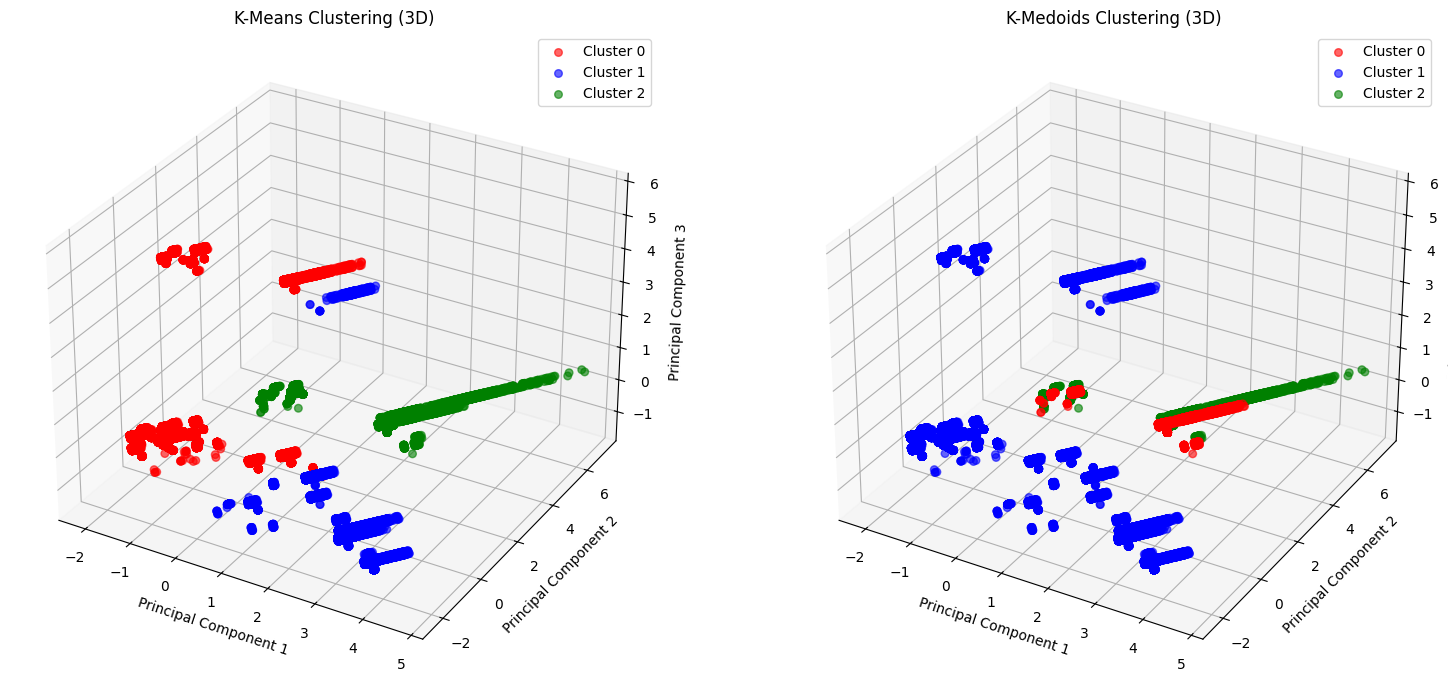

Explained Variance Ratio untuk 3 komponen utama:
PC1: 0.1602 (16.02%)
PC2: 0.1040 (10.40%)
PC3: 0.0895 (8.95%)
Total explained variance: 0.3537 (35.37%)


In [ ]:
df_with_clusters = df_processed.copy()
df_with_clusters['Operating Airline'] = df['Operating Airline']
df_with_clusters['Activity Period'] = df['Activity Period']
df_with_clusters['GEO Summary'] = df['GEO Summary']
df_with_clusters['Activity Type Code'] = df['Activity Type Code']
df_with_clusters['Terminal'] = df['Terminal']
df_with_clusters['Passenger Count'] = df['Passenger Count']

k = 4

print("K-MEANS CLUSTER ANALYSIS")
print("="*50)

for cluster_id in range(k):
    cluster_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == cluster_id]
    print(f"\nCLUSTER {cluster_id} - {len(cluster_data)} data points")
    print("-" * 30)
    
    passenger_stats = cluster_data['Passenger Count'].describe()
    print(f"Passenger Count Statistics:")
    print(f"   Mean: {passenger_stats['mean']:,.0f}")
    print(f"   Median: {passenger_stats['50%']:,.0f}")
    print(f"   Min: {passenger_stats['min']:,.0f}")
    print(f"   Max: {passenger_stats['max']:,.0f}")
    
    print(f"\nTop 3 GEO Summary:")
    geo_summary = cluster_data['GEO Summary'].value_counts().head(3)
    for geo, count in geo_summary.items():
        print(f"   {geo}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    print(f"\nTop 3 Activity Types:")
    activity_types = cluster_data['Activity Type Code'].value_counts().head(3)
    for activity, count in activity_types.items():
        print(f"   {activity}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    print(f"\nTerminal Distribution:")
    terminals = cluster_data['Terminal'].value_counts().head(3)
    for terminal, count in terminals.items():
        print(f"   {terminal}: {count} ({count/len(cluster_data)*100:.1f}%)")

print("\n" + "="*50)
print("K-MEDOIDS CLUSTER ANALYSIS")
print("="*50)

for cluster_id in range(k):
    cluster_data = df_with_clusters[df_with_clusters['KMedoids_Cluster'] == cluster_id]
    print(f"\nCLUSTER {cluster_id} - {len(cluster_data)} data points")
    print("-" * 30)
    
    passenger_stats = cluster_data['Passenger Count'].describe()
    print(f"Passenger Count Statistics:")
    print(f"   Mean: {passenger_stats['mean']:,.0f}")
    print(f"   Median: {passenger_stats['50%']:,.0f}")
    print(f"   Min: {passenger_stats['min']:,.0f}")
    print(f"   Max: {passenger_stats['max']:,.0f}")
    
    print(f"\nTop 3 GEO Summary:")
    geo_summary = cluster_data['GEO Summary'].value_counts().head(3)
    for geo, count in geo_summary.items():
        print(f"   {geo}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    print(f"\nTop 3 Activity Types:")
    activity_types = cluster_data['Activity Type Code'].value_counts().head(3)
    for activity, count in activity_types.items():
        print(f"   {activity}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    print(f"\nTerminal Distribution:")
    terminals = cluster_data['Terminal'].value_counts().head(3)
    for terminal, count in terminals.items():
        print(f"   {terminal}: {count} ({count/len(cluster_data)*100:.1f}%)")

In [17]:
# Agregasi cluster berdasarkan fitur asli
# Gabungkan data asli dengan label cluster
df_with_clusters = df.copy()
df_with_clusters['kmeans_cluster'] = df_processed['kmeans_cluster']
df_with_clusters['kmedoids_cluster'] = df_processed['kmedoids_cluster']

# Convert 'Passenger Count' untuk analisis numerik
df_with_clusters['Passenger Count'] = df_with_clusters['Passenger Count'].astype(str).str.replace(',', '', regex=False)
df_with_clusters['Passenger Count'] = pd.to_numeric(df_with_clusters['Passenger Count'], errors='coerce')

print("="*70)
print("ANALISIS KARAKTERISTIK CLUSTER K-MEANS")
print("="*70)

# Analisis K-Means clusters
for cluster_id in range(k):
    cluster_data = df_with_clusters[df_with_clusters['kmeans_cluster'] == cluster_id]
    print(f"\n🔹 CLUSTER {cluster_id} (K-Means) - {len(cluster_data)} data points")
    print("-" * 50)
    
    # Statistik Passenger Count
    passenger_stats = cluster_data['Passenger Count'].describe()
    print(f"📊 Passenger Count Statistics:")
    print(f"   Mean: {passenger_stats['mean']:,.0f}")
    print(f"   Median: {passenger_stats['50%']:,.0f}")
    print(f"   Min: {passenger_stats['min']:,.0f}")
    print(f"   Max: {passenger_stats['max']:,.0f}")
    
    # Top GEO Summary
    print(f"\n🌍 Top 3 GEO Summary:")
    geo_summary = cluster_data['GEO Summary'].value_counts().head(3)
    for geo, count in geo_summary.items():
        print(f"   {geo}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    # Top Activity Types
    print(f"\n✈️ Top 3 Activity Types:")
    activity_types = cluster_data['Activity Type Code'].value_counts().head(3)
    for activity, count in activity_types.items():
        print(f"   {activity}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    # Terminal distribution
    print(f"\n🏢 Terminal Distribution:")
    terminals = cluster_data['Terminal'].value_counts().head(3)
    for terminal, count in terminals.items():
        print(f"   {terminal}: {count} ({count/len(cluster_data)*100:.1f}%)")

print("\n" + "="*70)
print("ANALISIS KARAKTERISTIK CLUSTER K-MEDOIDS")
print("="*70)

# Analisis K-Medoids clusters
for cluster_id in range(k):
    cluster_data = df_with_clusters[df_with_clusters['kmedoids_cluster'] == cluster_id]
    print(f"\n🔸 CLUSTER {cluster_id} (K-Medoids) - {len(cluster_data)} data points")
    print("-" * 50)
    
    # Statistik Passenger Count
    passenger_stats = cluster_data['Passenger Count'].describe()
    print(f"📊 Passenger Count Statistics:")
    print(f"   Mean: {passenger_stats['mean']:,.0f}")
    print(f"   Median: {passenger_stats['50%']:,.0f}")
    print(f"   Min: {passenger_stats['min']:,.0f}")
    print(f"   Max: {passenger_stats['max']:,.0f}")
    
    # Top GEO Summary
    print(f"\n🌍 Top 3 GEO Summary:")
    geo_summary = cluster_data['GEO Summary'].value_counts().head(3)
    for geo, count in geo_summary.items():
        print(f"   {geo}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    # Top Activity Types
    print(f"\n✈️ Top 3 Activity Types:")
    activity_types = cluster_data['Activity Type Code'].value_counts().head(3)
    for activity, count in activity_types.items():
        print(f"   {activity}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    # Terminal distribution
    print(f"\n🏢 Terminal Distribution:")
    terminals = cluster_data['Terminal'].value_counts().head(3)
    for terminal, count in terminals.items():
        print(f"   {terminal}: {count} ({count/len(cluster_data)*100:.1f}%)")

ANALISIS KARAKTERISTIK CLUSTER K-MEANS

🔹 CLUSTER 0 (K-Means) - 25447 data points
--------------------------------------------------
📊 Passenger Count Statistics:
   Mean: 12,638
   Median: 7,592
   Min: 1
   Max: 306,726

🌍 Top 3 GEO Summary:
   International: 22931 (90.1%)
   Domestic: 2516 (9.9%)

✈️ Top 3 Activity Types:
   Deplaned: 12196 (47.9%)
   Enplaned: 12012 (47.2%)
   Thru / Transit: 1239 (4.9%)

🏢 Terminal Distribution:
   International: 22972 (90.3%)
   Terminal 2: 2444 (9.6%)
   Other: 31 (0.1%)

🔹 CLUSTER 1 (K-Means) - 8255 data points
--------------------------------------------------
📊 Passenger Count Statistics:
   Mean: 37,755
   Median: 19,233
   Min: 0
   Max: 258,124

🌍 Top 3 GEO Summary:
   Domestic: 7809 (94.6%)
   International: 446 (5.4%)

✈️ Top 3 Activity Types:
   Enplaned: 3969 (48.1%)
   Deplaned: 3900 (47.2%)
   Thru / Transit: 386 (4.7%)

🏢 Terminal Distribution:
   Terminal 1: 6932 (84.0%)
   International: 1133 (13.7%)
   Terminal 2: 190 (2.3%)

🔹 C

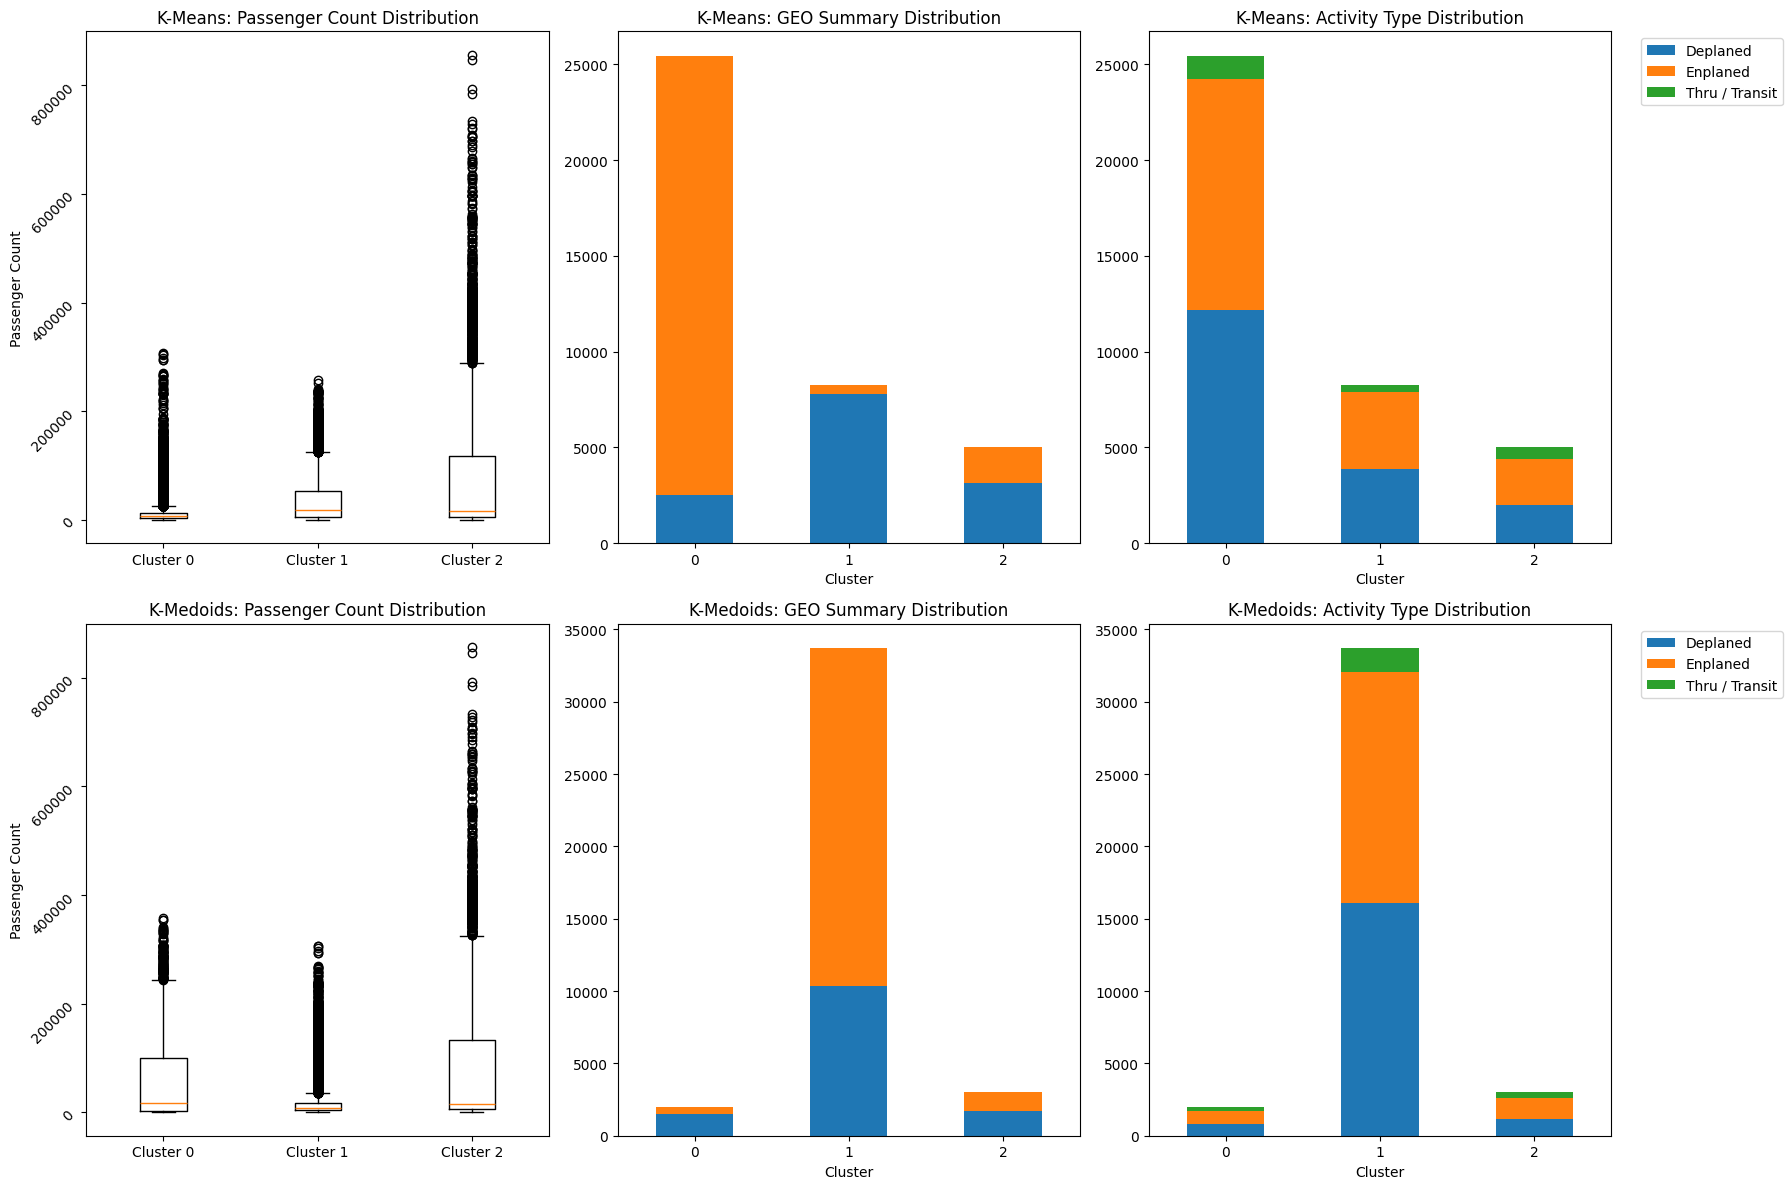

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].boxplot([df_with_clusters[df_with_clusters['KMeans_Cluster'] == i]['Passenger Count'] 
                   for i in range(k)], tick_labels=[f'Cluster {i}' for i in range(k)])
axes[0, 0].set_title('K-Means: Passenger Count Distribution')
axes[0, 0].set_ylabel('Passenger Count')

axes[1, 0].boxplot([df_with_clusters[df_with_clusters['KMedoids_Cluster'] == i]['Passenger Count'] 
                   for i in range(k)], tick_labels=[f'Cluster {i}' for i in range(k)])
axes[1, 0].set_title('K-Medoids: Passenger Count Distribution')
axes[1, 0].set_ylabel('Passenger Count')

geo_kmeans = df_with_clusters.groupby(['KMeans_Cluster', 'GEO Summary']).size().unstack(fill_value=0)
geo_kmeans.plot(kind='bar', stacked=True, ax=axes[0, 1], legend=False)
axes[0, 1].set_title('K-Means: GEO Summary Distribution')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].tick_params(axis='x', rotation=0)

geo_kmedoids = df_with_clusters.groupby(['KMedoids_Cluster', 'GEO Summary']).size().unstack(fill_value=0)
geo_kmedoids.plot(kind='bar', stacked=True, ax=axes[1, 1], legend=False)
axes[1, 1].set_title('K-Medoids: GEO Summary Distribution')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].tick_params(axis='x', rotation=0)

activity_kmeans = df_with_clusters.groupby(['KMeans_Cluster', 'Activity Type Code']).size().unstack(fill_value=0)
activity_kmeans.plot(kind='bar', stacked=True, ax=axes[0, 2])
axes[0, 2].set_title('K-Means: Activity Type Distribution')
axes[0, 2].set_xlabel('Cluster')
axes[0, 2].tick_params(axis='x', rotation=0)
axes[0, 2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

activity_kmedoids = df_with_clusters.groupby(['KMedoids_Cluster', 'Activity Type Code']).size().unstack(fill_value=0)
activity_kmedoids.plot(kind='bar', stacked=True, ax=axes[1, 2])
axes[1, 2].set_title('K-Medoids: Activity Type Distribution')
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].tick_params(axis='x', rotation=0)
axes[1, 2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()